In [20]:
import numpy as np
import struct
# import pandas as pd
# import xarray as xr
# import geopandas as gpd
# import regionmask, struct
import matplotlib.pyplot as plt
import rioxarray
from pyproj import Transformer
import cartopy.crs as ccrs

In [21]:
obj = ccrs.LambertAzimuthalEqualArea(105, 47)
obj_proj = obj.to_string()

obj_proj = 'EPSG:3408'

transformer = Transformer.from_crs('EPSG:4326', obj_proj)
transformer_inv = Transformer.from_crs(obj_proj, 'EPSG:4326')

workplace = './'

In [22]:
icesheet = rioxarray.open_rasterio('IceMask01.asc').rio.write_crs(obj_proj)

# icesheet = icesheet.rio.reproject('EPSG:4326')

In [23]:
drang = rioxarray.open_rasterio('PanArcticMask01.asc').rio.write_crs(obj_proj)

#  Processsing Vegetation ...

In [24]:
vege = rioxarray.open_rasterio('temveg2arctic1999.ease.asc').rio.write_crs(obj_proj) #.rio.write_nodata(-9999, inplace=True)#.rio.reproject('EPSG:4326')

vege.values[icesheet.values == 1] = -9999 # ocean
vege.values[icesheet.values == 2] = -9999 # ice
vege.values[icesheet.values == -9999] = -9999 # nodata

vege.values[drang.values == 0] = -9999
vege.values[drang.values == 1] = -9999
vege.values[drang.values == -9999] = -9999

vege.values[vege.values ==  0] = -9999
vege.values[vege.values ==  9] = -9999
vege.values[vege.values == 10] = -9999

aaa = 5E6
bbb = 3.75E6

vege = vege.rio.clip_box(
    minx=-aaa,
    miny=-bbb,
    maxx=aaa,
    maxy=bbb,
)

vege_proj = vege.rio.reproject('EPSG:4326')

print(np.sum(vege.values > 0))

np.unique(vege.values.flatten())

35279


array([-9999,     1,     2,     3,     4,     5,     6,     8],
      dtype=int32)

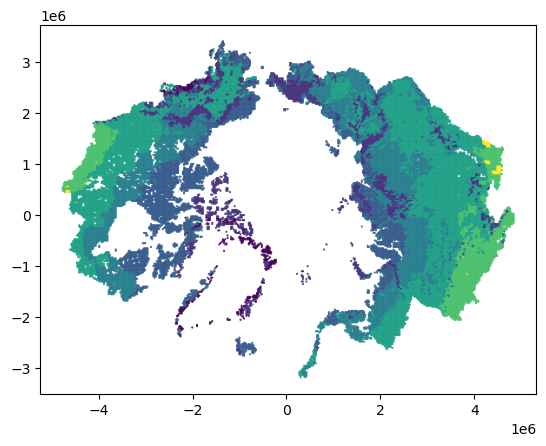

In [25]:
lon, lat = np.meshgrid(vege.x, vege.y)
plt.scatter(lon[vege.values[0,:,:]>0], lat[vege.values[0,:,:]>0], 
            c = vege.values[0,:,:][vege.values[0,:,:]>0], 
            s=0.25)

In [26]:
vege00 = vege.copy()
vege00.values[vege.values == -9999] = 24
vege00.rio.to_raster('vege.asc')

#  Processsing Topography ...

In [27]:
topo = rioxarray.open_rasterio('g_mean.asc').rio.write_crs(obj_proj) #.rio.write_nodata(-9999, inplace=True)#.rio.reproject('EPSG:4326')

topo.values[icesheet.values == 1] = -9999 # ocean
topo.values[icesheet.values == 2] = -9999 # ice
topo.values[icesheet.values == -9999] = -9999 # nodata

topo.values[drang.values == 0] = -9999
topo.values[drang.values == 1] = -9999
topo.values[drang.values == -9999] = -9999

aaa = 5E6
bbb = 3.75E6

topo = topo.rio.clip_box(
    minx=-aaa,
    miny=-bbb,
    maxx=aaa,
    maxy=bbb,
)

topo.values[vege.values ==  0] = -9999
topo.values[vege.values ==  9] = -9999
topo.values[vege.values == 10] = -9999
topo.values[vege.values == -9999] = -9999

topo_proj = topo.rio.reproject('EPSG:4326')

print(np.sum(topo.values > 0))

topo

35279


<xarray.DataArray (band: 1, y: 301, x: 399)>
array([[[-9999., -9999., ..., -9999., -9999.],
        [-9999., -9999., ..., -9999., -9999.],
        ...,
        [-9999., -9999., ..., -9999., -9999.],
        [-9999., -9999., ..., -9999., -9999.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -4.988e+06 -4.963e+06 ... 4.963e+06 4.988e+06
  * y            (y) float64 3.76e+06 3.735e+06 ... -3.735e+06 -3.76e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     -9999.0

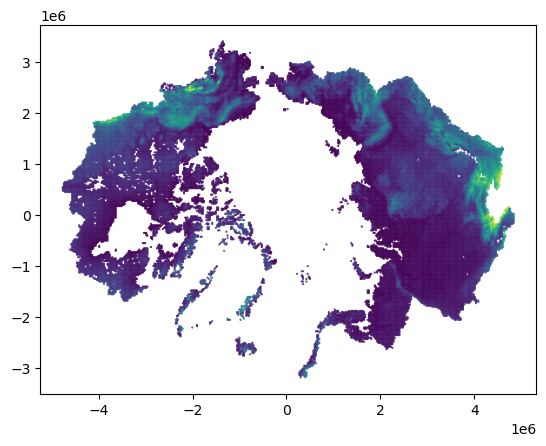

In [28]:
lon, lat = np.meshgrid(topo.x, topo.y)
plt.scatter(lon[topo.values[0,:,:]>0], lat[topo.values[0,:,:]>0], 
            c = topo.values[0,:,:][topo.values[0,:,:]>0], 
            s=0.25)

lat_max=83.34 lat_min=45.52


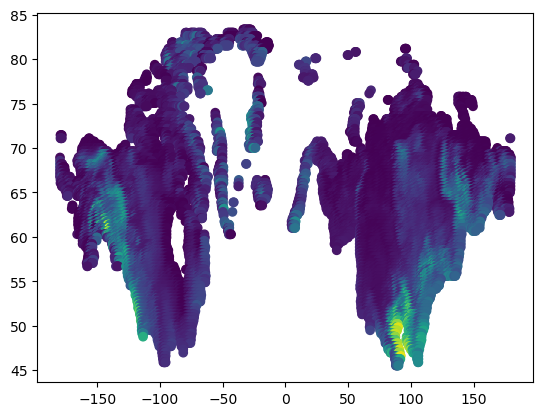

In [29]:
lon2, lat2 = np.meshgrid(topo_proj.x, topo_proj.y)
plt.scatter(lon2[topo_proj.values[0,:,:]>0], lat2[topo_proj.values[0,:,:]>0], c = topo_proj.values[0,:,:][topo_proj.values[0,:,:]>0])

print("lat_max={:0.2f}".format(lat2[topo_proj.values[0,:,:]>0].max()), 
      "lat_min={:0.2f}".format(lat2[topo_proj.values[0,:,:]>0].min()))

In [30]:
topo00 = topo.copy()
topo00.values[topo.values == -9999] = 0
topo00.rio.to_raster('topo.asc')